# </span> Cluster Analysis</h1>
<hr>


Here we will build clustering models and  will apply the K-Means algorithm to 3 different feature sets. Post that we will compare all of three models




** Importing libraries and load the datasets. **


In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

**Import 3 CSV files we've saved before**
* <code style="color:crimson">'Customer_df_analysis.csv'</code>  as <code style="color:steelblue">base_df</code>. 
* <code style="color:crimson">'threshold_item_data.csv'</code>  as <code style="color:steelblue">threshold_item_data</code>. 
*  <code style="color:crimson">'pca_item_data.csv'</code>  as <code style="color:steelblue">pca_item_data</code>. 
* Set <code style="color:steelblue">index_col=0</code> for each one to use CustomerID as the index.

In [134]:
# Import analytical base table
base_df = pd.read_csv('Customer_df_analysis.csv', index_col=0)

# Import thresholded item features
threshold_item_data = pd.read_csv('threshold_item_data.csv', index_col=0)

# Import PCA item features
pca_item_data = pd.read_csv('pca_item_data.csv', index_col=0)

**Print the shape of each one to make sure we're on the same page.**

In [135]:
# Print shape of each dataframe
print(base_df.shape)
print(threshold_item_data.shape)
print(pca_item_data.shape)

(422, 8)
(422, 20)
(422, 150)


<span id="k-means"></span>
# 1. K-Means

Algorithm we choose is typically less important than the **input features** that you feed into it. 

<br>
**We already have a <code style="color:steelblue">base_df</code>.** 

** Below dataframe were created by joing base dataframe(base_df) **

* Created a threshold_df by joining it with threshold_item_data

* Created a pca_df by joining base_df with pca_item_data


In [136]:
# Join base_df with threshold_item_data
threshold_df = base_df.join(threshold_item_data)

# Display first 5 rows of threshold_df
threshold_df.head(5)

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,23245,22961,...,21212,22551,22629,21731,22328,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,364,103,8620.00,23.681319,1231.428571,449.64,2588.64,0,0,...,0,0,0,10,0,0,0,8,0,0
12348,4,62,22,3594.48,57.975484,898.620000,454.88,1785.60,0,0,...,0,0,0,0,0,0,0,0,0,8
12349,1,146,73,3515.10,24.076027,3515.100000,3515.10,3515.10,0,0,...,0,0,0,0,0,2,2,2,2,2
12350,1,34,17,668.80,19.670588,668.800000,668.80,668.80,0,0,...,0,2,0,0,0,0,0,0,0,2
12352,11,180,59,4051.45,22.508056,368.313636,-463.80,1680.60,4,0,...,0,0,0,2,0,0,0,4,0,10


In [137]:
# Join base_df with pca_item_data
pca_df = base_df.join(pca_item_data)

# Display first 5 rows of pca_df
pca_df.head(5)

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,...,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,364,103,8620.00,23.681319,1231.428571,449.64,2588.64,5.180637,0.718817,...,-0.386068,0.254882,-0.329126,-0.358201,0.388337,0.168290,-0.151342,0.271423,-0.336562,-0.247673
12348,4,62,22,3594.48,57.975484,898.620000,454.88,1785.60,-3.368000,-3.446605,...,-2.724333,-0.548671,-2.516676,-0.257042,-2.321222,-1.591302,-0.600727,-0.343007,1.731005,-0.531659
12349,1,146,73,3515.10,24.076027,3515.100000,3515.10,3515.10,-0.569100,-1.702423,...,-4.485941,-2.285976,0.570606,-1.017735,-0.826733,3.639234,0.218958,1.496317,3.248453,-1.559561
12350,1,34,17,668.80,19.670588,668.800000,668.80,668.80,-3.942596,-3.817904,...,-1.275901,-0.192770,0.663523,-1.424855,1.689081,-0.899429,-0.361802,0.134626,0.028826,-0.165470
12352,11,180,59,4051.45,22.508056,368.313636,-463.80,1680.60,-1.103741,-2.810863,...,5.743390,-3.158203,-4.252726,-3.792803,2.921810,-0.589005,0.562711,1.210157,5.504787,1.481877


<span id="base"></span>
# 2. Base DF- Feature 1


In [138]:
# First 5 observations of base_df
base_df.head(5)

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,364,103,8620.00,23.681319,1231.428571,449.64,2588.64
12348,4,62,22,3594.48,57.975484,898.620000,454.88,1785.60
12349,1,146,73,3515.10,24.076027,3515.100000,3515.10,3515.10
12350,1,34,17,668.80,19.670588,668.800000,668.80,668.80
12352,11,180,59,4051.45,22.508056,368.313636,-463.80,1680.60


** Initialize a model pipeline for K-Means.**
* Control the number of clusters using <code style="color:steelblue">n_clusters=3</code>. This is the hyperparameter $k$.
* We also set <code style="color:steelblue">random_state=126</code> for replicable results. 

In [139]:
# K-Means model pipeline
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=126))

**Once we have the pipeline, fitting the model is just 1 line of code.**

In [140]:
# Fit K-Means pipeline
kmeans.fit(base_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=126, tol=0.0001, verbose=0))])

**Let's save the clusters to our dataframe.**

In [141]:
# Save clusters to base_df
base_df['cluster'] = kmeans.predict(base_df)

# Display first 5 rows of base_df
base_df.head(10)

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,364,103,8620.00,23.681319,1231.428571,449.64,2588.64,0
12348,4,62,22,3594.48,57.975484,898.620000,454.88,1785.60,0
12349,1,146,73,3515.10,24.076027,3515.100000,3515.10,3515.10,0
12350,1,34,17,668.80,19.670588,668.800000,668.80,668.80,0
12352,11,180,59,4051.45,22.508056,368.313636,-463.80,1680.60,0
12353,1,8,4,178.00,22.250000,178.000000,178.00,178.00,0
12354,1,116,58,2158.80,18.610345,2158.800000,2158.80,2158.80,0
12355,1,26,13,918.80,35.338462,918.800000,918.80,918.80,0
12356,3,118,53,5622.86,47.651356,1874.286667,116.70,4543.24,0


**To visualize these clusters, we can plot a scatterplot and color the points by cluster.**


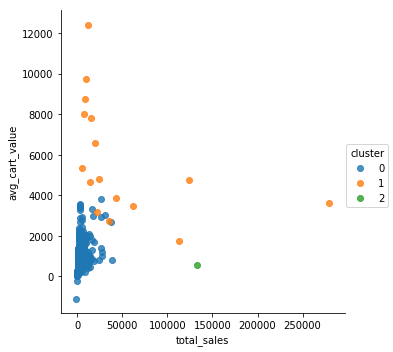

In [142]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales',y = 'avg_cart_value', data=base_df, hue='cluster', fit_reg=False)
plt.show()

<span id="threshold"></span>
# 3. Threshold DF- Feature 2

The second set of features we'll consider is **"Threshold DF"**. 
* This includes the purchase pattern features from our analytical base table.
* This also includes the purchase counts for the 20 most popular items.

Repeating the same steps as above.

<br>
**First, initialize a new model pipeline for K-Means.**
* Set it to create 3 clusters.
* Also set <code style="color:steelblue">random_state=126</code> for replicable results. 

In [143]:
# K-Means model pipeline
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=126))

**Next, fit the K-Means model pipeline to <code style="color:steelblue">threshold_df</code>.**

In [144]:
# Fit K-Means pipeline
kmeans.fit(threshold_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=126, tol=0.0001, verbose=0))])

**Save the clusters to <code style="color:steelblue">threshold_df</code>.**

In [145]:
# Save clusters to threshold_df
threshold_df['cluster'] = kmeans.predict(threshold_df)

# Display first 5 rows of threshold_df
threshold_df.head(10)

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,23245,22961,...,22551,22629,21731,22328,22556,22554,22423,22326,POST,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,364,103,8620.00,23.681319,1231.428571,449.64,2588.64,0,0,...,0,0,10,0,0,0,8,0,0,1
12348,4,62,22,3594.48,57.975484,898.620000,454.88,1785.60,0,0,...,0,0,0,0,0,0,0,0,8,1
12349,1,146,73,3515.10,24.076027,3515.100000,3515.10,3515.10,0,0,...,0,0,0,0,2,2,2,2,2,1
12350,1,34,17,668.80,19.670588,668.800000,668.80,668.80,0,0,...,2,0,0,0,0,0,0,0,2,1
12352,11,180,59,4051.45,22.508056,368.313636,-463.80,1680.60,4,0,...,0,0,2,0,0,0,4,0,10,1
12353,1,8,4,178.00,22.250000,178.000000,178.00,178.00,0,0,...,0,0,0,0,0,0,0,0,0,1
12354,1,116,58,2158.80,18.610345,2158.800000,2158.80,2158.80,0,0,...,0,2,2,0,0,0,0,2,0,1
12355,1,26,13,918.80,35.338462,918.800000,918.80,918.80,0,0,...,0,0,0,0,0,0,2,0,0,1
12356,3,118,53,5622.86,47.651356,1874.286667,116.70,4543.24,0,0,...,0,0,0,0,0,0,6,0,2,1



<br>
**To visualize these clusters, plot a scatterplot and color the points by cluster.**


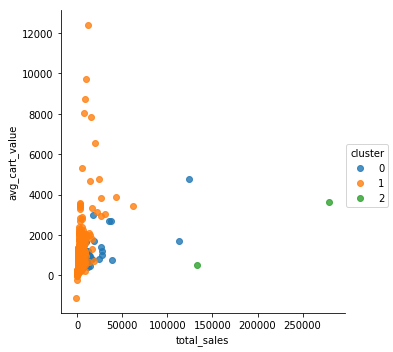

In [146]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales',y = 'avg_cart_value', data=threshold_df, hue='cluster', fit_reg=False)
plt.show()

<span id="pca"></span>
# 4. PCA DF- Feature 3


* This includes the purchase pattern features from our analytical base table.
* This also includes the first 150 principal component features from the item data.

Repeating the same steps as above.

<br>

**First, initialize a new model pipeline for K-Means.**
* Set it to create 3 clusters.
* Also set <code style="color:steelblue">random_state=126</code> for replicable results. 

In [147]:
# K-Means model pipeline
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=126))

**Next, fit the K-Means model pipeline to <code style="color:steelblue">pca_df</code>.**

In [148]:
# Fit K-Means pipeline
kmeans.fit(pca_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=126, tol=0.0001, verbose=0))])

**Save the clusters to <code style="color:steelblue">pca_df</code>.**

In [149]:
# Save clusters to pca_df
pca_df['cluster'] = kmeans.predict(pca_df)

# Display first 5 rows of pca_df
pca_df.head(10)

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,...,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,364,103,8620.00,23.681319,1231.428571,449.64,2588.64,5.180637,0.718817,...,0.254882,-0.329126,-0.358201,0.388337,0.168290,-0.151342,0.271423,-0.336562,-0.247673,1
12348,4,62,22,3594.48,57.975484,898.620000,454.88,1785.60,-3.368000,-3.446605,...,-0.548671,-2.516676,-0.257042,-2.321222,-1.591302,-0.600727,-0.343007,1.731005,-0.531659,1
12349,1,146,73,3515.10,24.076027,3515.100000,3515.10,3515.10,-0.569100,-1.702423,...,-2.285976,0.570606,-1.017735,-0.826733,3.639234,0.218958,1.496317,3.248453,-1.559561,1
12350,1,34,17,668.80,19.670588,668.800000,668.80,668.80,-3.942596,-3.817904,...,-0.192770,0.663523,-1.424855,1.689081,-0.899429,-0.361802,0.134626,0.028826,-0.165470,1
12352,11,180,59,4051.45,22.508056,368.313636,-463.80,1680.60,-1.103741,-2.810863,...,-3.158203,-4.252726,-3.792803,2.921810,-0.589005,0.562711,1.210157,5.504787,1.481877,1
12353,1,8,4,178.00,22.250000,178.000000,178.00,178.00,-4.540298,-4.788388,...,-0.235430,0.013037,-0.441749,0.294862,-0.394830,-0.068304,0.014870,-0.519529,-0.185811,1
12354,1,116,58,2158.80,18.610345,2158.800000,2158.80,2158.80,-2.553964,-1.388571,...,-0.193966,-0.064897,0.029829,0.510164,0.236600,0.415895,-0.182039,-0.624413,0.139664,1
12355,1,26,13,918.80,35.338462,918.800000,918.80,918.80,-3.550871,-4.854735,...,1.573874,0.476167,-0.212769,-0.351324,0.439689,-1.141317,0.830510,-0.030612,-0.251808,1
12356,3,118,53,5622.86,47.651356,1874.286667,116.70,4543.24,-2.580703,-2.600677,...,3.330336,-3.560060,-1.113631,1.802057,0.250998,2.462191,0.622041,1.748562,-2.759787,1



<br>
**To visualize these clusters, plot a scatterplot and color the points by cluster.**
* Use the same 2 features as in the scatterplot above so that you can visually contrast the plots.
* Use the <code style="color:steelblue">hue=</code> argument to color by cluster.

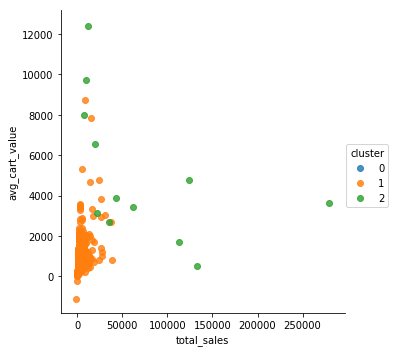

In [150]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales',y = 'avg_cart_value', data=pca_df, hue='cluster', fit_reg=False)
plt.show()

<span id="comparison"></span>
# 5. Model comparison

Each of those 3 dataframes have the same indices:

In [151]:
# Check all indices are identical
print(all(base_df.index == threshold_df.index))
print(all(base_df.index == pca_df.index))

True
True


** Importing the adjusted Rand index from Scikit-Learn.**

In [152]:
# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score

**We can see the adjusted Rand index between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">threshold_df.cluster</code> like so:**

In [153]:
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.11352673471033736

**Finally, display the adjusted Rand index between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">pca_df.cluster</code>.**


In [154]:
# Similary between base_df.cluster and pca_df.cluster
adjusted_rand_score(base_df.cluster, pca_df.cluster)

0.78161752101988669

** Looking on to the above score, we can see that base dataframe is much closer to the PCA dataframe than threshold dataframe **